<a href="https://colab.research.google.com/github/muscak/Master-Machine-Learning-Algorithms/blob/master/Nonlinear-Algorithms/Support-Vector-Machines/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines (SVM)

In machine learning, support vector machines (SVMs, also support vector networks) are supervised learning models with associated learning algorithms that analyze data for classification and regression analysis [1].

## Table of Contents

## Introduction<a id='intro'></a>

Basic SVM as described in this chapter is intended for binary classification problems. Although, extensions have been developed for regression and multiclass classification.

## Import Libraries<a id='libraries'></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
sb.set_style('whitegrid')
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

## Create Sample Data<a id='sample'></a>

The dataset contains two input variables ($x_1$ and $x_2$) and the class output variable with the values -1 and 1. The dataset contains 10 records, 5 that belong to each class.

In [2]:
x1 = [2.327868056, 3.032830419, 4.485465382, 3.684815246, 2.283558563, 
      7.807521179, 6.132998136, 7.514829366, 5.502385039, 7.432932365]
x2 = [2.458016525, 3.170770366, 3.696728111, 3.846846973, 1.853215997, 
      3.290132136, 2.140563087, 2.107056961, 1.404002608, 4.236232628]
y = [-1, -1, -1, -1, -1, 1, 1, 1, 1, 1]

df = pd.DataFrame(zip(x1, x2, y), columns=['x1', 'x2', 'y'])
df

,x1,x2,y
0,2.327868,2.458017,-1
1,3.032830,3.170770,-1
2,4.485465,3.696728,-1
3,3.684815,3.846847,-1
4,2.283559,1.853216,-1
5,7.807521,3.290132,1
6,6.132998,2.140563,1
7,7.514829,2.107057,1
8,5.502385,1.404003,1
9,7.432932,4.236233,1


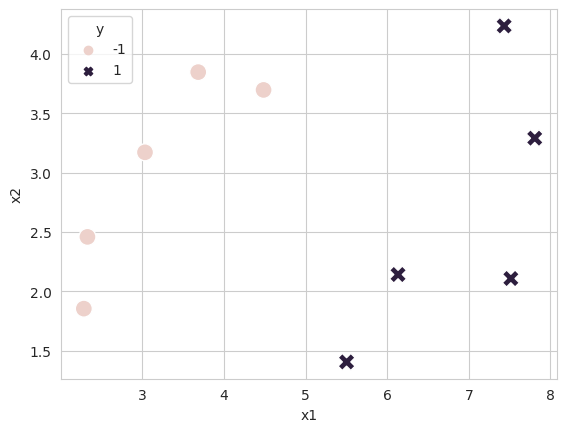

In [3]:
sb.scatterplot(data=df, x='x1', y='x2', hue='y', style='y', s=150)
plt.show()

## Manual Implementation<a id='manual'></a>

$$(b_1 × x_1) + (b_2 × x_2) = 0$$ 
We'll assume bias term ($b_0$) also called the intercept as 0.

### Optimization Method

$$output = y × ((b_1 × x_1) + (b_2 × x_2) + ... + (b_i × x_i))$$

If the output value is greater than 1 it suggests that the training pattern was not a support vector and in this case the weights ($b_i$) are slightly decreased:
$$b_{ij+1} = (1 - \frac{1}{t}) × b_{ij}$$

Else, it is assumed that the training instance is a support vector and must be updated to better explain the data.
$$b_{ij+1} = (1 - \frac{1}{t}) × b_{ij} + \frac{1}{λ × t} × (y_j × x_{ij})$$

In [43]:
def train(df, epoch):
  # Set the initial weights
  b1 = 0
  b2 = 0

  lr = 0.45 

  df_train = pd.DataFrame(columns=['x1', 'x2', 'y', 'b1', 'b2', 'output', 
                                  'prediction', 'sharp', 'error'])
  accuracy = []

  for i in range(0, epoch):
    df_temp = df.copy()
    df_train = pd.concat([df_train, df_temp], ignore_index=True)

  df_train.loc[0, 'b1'] = b1
  df_train.loc[0, 'b2'] = b2

  for j in range(0, len(df_train)):
    df_train.loc[j, 'output'] = df_train.loc[j, 'y'] * ((df_train.loc[j, 'b1'] * df_train.loc[j, 'x1']) + (df_train.loc[j, 'b2'] * df_train.loc[j, 'x2']))
    if(j+1 < len(df_train)):
      if(df_train.loc[j, 'output'] < 1):
        df_train.loc[j+1, 'b1'] = (1 - 1/(j+1)) * df_train.loc[j, 'b1'] + (1/(lr*(j+1))) * df_train.loc[j, 'y'] * df_train.loc[j, 'x1']
        df_train.loc[j+1, 'b2'] = (1 - 1/(j+1)) * df_train.loc[j, 'b2'] + (1/(lr*(j+1))) * df_train.loc[j, 'y'] * df_train.loc[j, 'x2']
      else:
        df_train.loc[j+1, 'b1'] = (1 - 1/(j+1)) * df_train.loc[j, 'b1']
        df_train.loc[j+1, 'b2'] = (1 - 1/(j+1)) * df_train.loc[j, 'b2']

  df_train['prediction'] = (df_train['b1'] * df_train['x1']) + (df_train['b2'] * df_train['x2'])
  df_train.loc[df_train['prediction'] < 0, 'sharp'] = -1
  df_train.loc[df_train['prediction'] >= 0, 'sharp'] = 1

  df_train.loc[df_train['sharp'] == df_train['y'], 'error'] = 0
  df_train.loc[df_train['sharp'] != df_train['y'], 'error'] = 1

  l = 0
  for k in range(0, epoch):
    df_temp = df_train.loc[l:l+len(df)-1,].copy()
    acc = (1 - (df_temp['error'].sum() / len(df))) * 100
    accuracy.append(acc)
    l += len(df) - 1

  x_ticks = np.arange(start=1, stop=epoch, step=1)
  y_ticks = np.arange(start=0, stop=110, step=10)

  plt.plot(accuracy, linewidth=3)
  plt.xticks(x_ticks)
  plt.yticks(y_ticks)
  plt.xlabel('Epochs', fontsize=12)
  plt.ylabel('Accuracy', fontsize=12)
  plt.show()

  return df_train

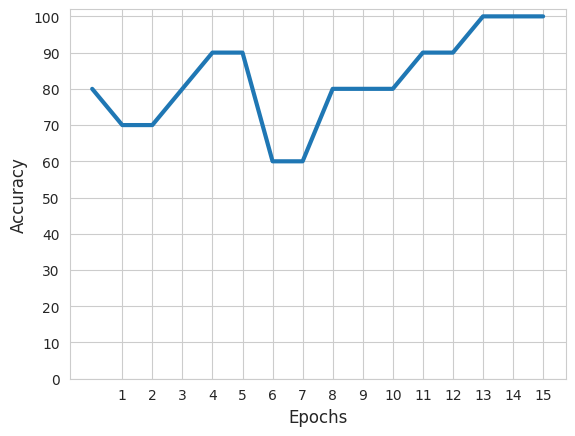

In [55]:
df_train = train(df, 16)

## Prediction

In [60]:
def predict(df, b1, b2):
  df_prediction = df.copy()

  df_prediction['output'] = b1*df_prediction['x1'] + b2*df_prediction['x2']
  df_prediction.loc[df_prediction['output'] < 0, 'sharp'] = -1
  df_prediction.loc[df_prediction['output'] >= 0, 'sharp'] = 1

  df_prediction.loc[df_prediction['sharp'] == df_prediction['y'], 'error'] = 0
  df_prediction.loc[df_prediction['sharp'] != df_prediction['y'], 'error'] = 1

  acc = (1 - (df_prediction['error'].sum() / len(df))) * 100

  print('Accuracy: {:.0f}%'.format(acc))

In [61]:
b1 = df_train['b1'].iloc[-1]
b2 = df_train['b2'].iloc[-1]

print('b1:',b1)
print('b2:',b2)
predict(df, b1, b2)

Accuracy: 50%


### Another Sample Data

In [52]:
x, y = make_classification(
    n_samples=100, # 100 observations 
    n_features=2, # 2 total features
    n_informative=2, # 2 'useful' features
    n_redundant=0,
    n_classes=2, # binary target/label 
    random_state=101 # if you want the same results as mine
)

# Turn it into dataframe
df_new = pd.DataFrame(zip(x[:,0], x[:,1], y), columns=['x1', 'x2', 'y'])
df_new.head()

,x1,x2,y
0,2.346697,1.998119,1
1,2.407103,2.203878,1
2,-0.077088,-1.432589,0
3,2.739183,1.153256,1
4,-0.755062,0.614306,1


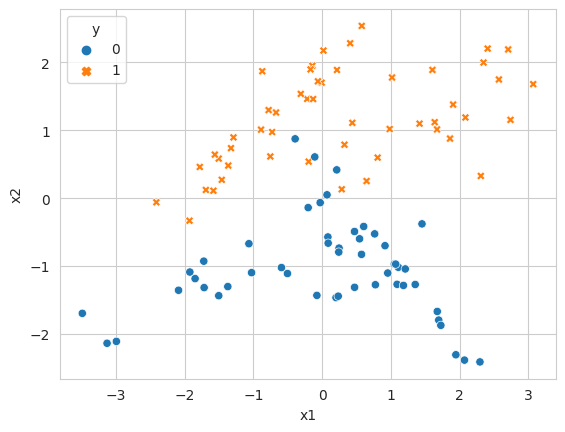

In [53]:
sb.scatterplot(data=df_new, x='x1', y='x2', hue='y', style='y')
plt.show()

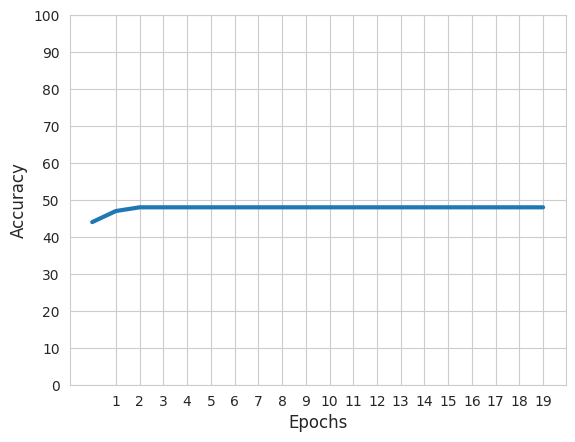

In [58]:
df_train = train(df_new, 20)

In [68]:
b1 = df_train['b1'].iloc[-1]
b2 = df_train['b2'].iloc[-1]

print('b1:',b1)
print('b2:',b2)
predict(df_new, b1, b2)

b1: -0.013396650421329448
b2: 0.6185653782176653
Accuracy: 48%


🔎 **Observation:**

## Using Sklearn Library<a id='sklearn'></a>

We'll use the `svc` function of `sklearn` library for the same dataset.


In [66]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [71]:
model = SVC(verbose=True, kernel='linear')
clf = model.fit(x, y)

[LibSVM]

In [72]:
print(clf.coef_)
y_hat = model.predict(x)
accuracy_score(y, y_hat)

[[-0.36456372  1.82946623]]


0.95

## Real Data<a id='real'></a>

## Conclusion<a id='conclusion'></a>

## References
---

[1] [Support vector machine](https://en.wikipedia.org/wiki/Support_vector_machine)